## Clean Data

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


### Read in Data

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('../titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean continuous variables

#### Fill missing for `Age`

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#since age is a numeric feature we can fill the missing values with the mean of the column value
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


#### Combine `SibSp` & `Parch`

"for i, col in enumerate(['SibSp', 'Parch']):\n    plt.figure(i)\n    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )"

<Figure size 432x288 with 0 Axes>

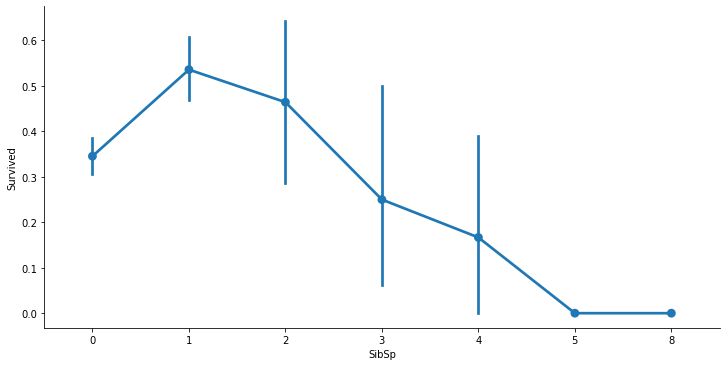

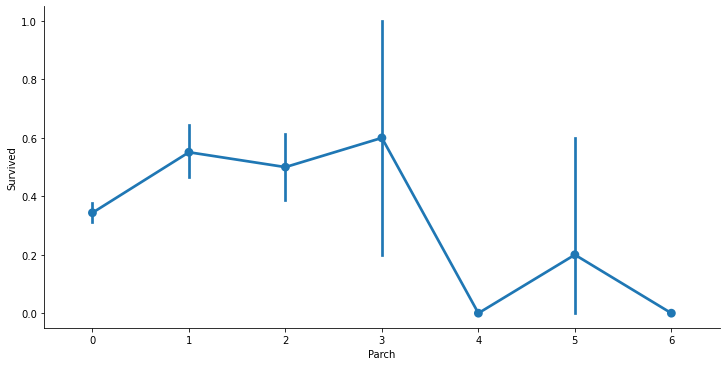

In [7]:
for i, col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=titanic,aspect=2,kind='point')

"""for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )"""

In [8]:
titanic['Family_cnt']=titanic['SibSp']+titanic['Parch']
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1


#### Drop unnnecessary variables

In [9]:
titanic.drop(['SibSp','Parch','PassengerId'],axis=1,inplace=True)
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


### Clean categorical variables

#### Fill in missing & create indicator for `Cabin`

In [10]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [11]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [12]:
#looking at the cabin map for the taitanic i decided to consider the level where the cabin is located 
titanic['cabin_ind']=np.where(titanic['Cabin'].isnull(),0,1)
titanic.head(10)
titanic['Cabin'].unique()
titanic['Level']= titanic['Cabin'].astype(str).str[0]
level= sorted(list(titanic['Level'].unique()))
level_dict={}
for i ,ch in enumerate(level):
    level_dict.update({ch:i+1})
titanic['LevelNo']=titanic['Level'].map(level_dict)
titanic.head()



,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,cabin_ind,Level,LevelNo
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0,n,9
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0,n,9
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1,C,3
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0,n,9


#### Convert `Sex` to numeric

In [13]:
gender_num = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,cabin_ind,Level,LevelNo
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0,n,9
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1,C,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0,n,9
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1,C,3
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0,n,9


#### Drop unnecessary variables

In [14]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,cabin_ind,Level,LevelNo
0,0,3,0,22.0,7.2500,1,0,n,9
1,1,1,1,38.0,71.2833,1,1,C,3
2,1,3,1,26.0,7.9250,0,0,n,9
3,1,1,1,35.0,53.1000,1,1,C,3
4,0,3,0,35.0,8.0500,0,0,n,9


C:\Users\zmazadi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zmazadi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Survived,Pclass,Sex,Age,Fare,Family_cnt,cabin_ind,LevelNo
0,0,3,0,22.000000,7.2500,1,0,9
1,1,1,1,38.000000,71.2833,1,1,3
2,1,3,1,26.000000,7.9250,0,0,9
3,1,1,1,35.000000,53.1000,1,1,3
4,0,3,0,35.000000,8.0500,0,0,9
5,0,3,0,29.699118,8.4583,0,0,9
6,0,1,0,54.000000,51.8625,0,1,5
7,0,3,0,2.000000,21.0750,4,0,9
8,1,3,1,27.000000,11.1333,2,0,9
9,1,2,1,14.000000,30.0708,1,0,9


<Figure size 432x288 with 0 Axes>

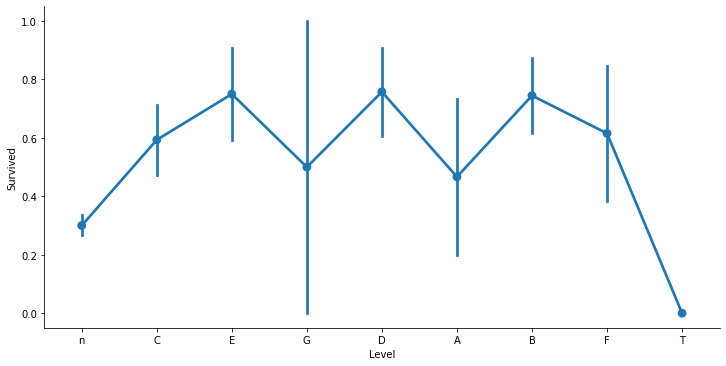

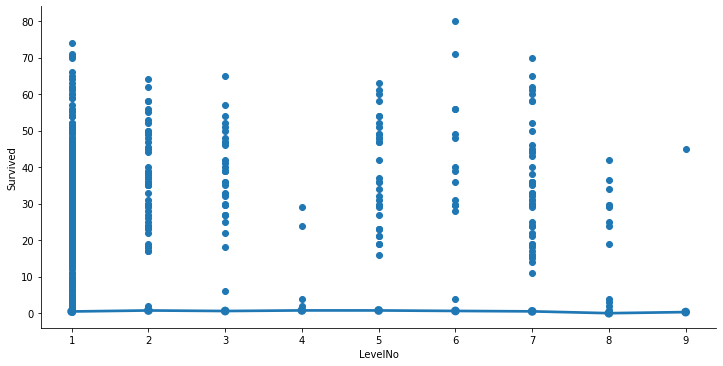

In [15]:
for i ,col in enumerate(['Level','LevelNo']):
    plt.figure(i)
    sns.catplot(col,y='Survived',data=titanic,kind='point',aspect=2)
plt.plot(titanic['Level'],titanic['Age'],'o')
titanic.drop(['Level'],axis=1,inplace=True)
titanic.head(10)

In [16]:
titanic.to_csv('../titanic_clean.csv',index=False)

### Split data for Training, Validation and Testing

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
titanic=pd.read_csv('../titanic_clean.csv')
titanic.head(10)

,Survived,Pclass,Sex,Age,Fare,Family_cnt,cabin_ind,LevelNo
0,0,3,0,22.000000,7.2500,1,0,9
1,1,1,1,38.000000,71.2833,1,1,3
2,1,3,1,26.000000,7.9250,0,0,9
3,1,1,1,35.000000,53.1000,1,1,3
4,0,3,0,35.000000,8.0500,0,0,9
5,0,3,0,29.699118,8.4583,0,0,9
6,0,1,0,54.000000,51.8625,0,1,5
7,0,3,0,2.000000,21.0750,4,0,9
8,1,3,1,27.000000,11.1333,2,0,9
9,1,2,1,14.000000,30.0708,1,0,9


In [19]:
features=titanic.drop(['Survived'],axis=1)

labels=titanic['Survived']
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.4,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)
for dataset in [y_test,y_val,y_train]:    
    print(round(len(dataset)/len(labels),2))
labels

0.2
0.2
0.6


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
x_train.to_csv('../train_f.csv',index=False)
x_val.to_csv('../val_f.csv',index=False)
x_test.to_csv('../test_f.csv',index=False)

y_train.to_csv('../train_label.csv',index=False)
y_val.to_csv('../val_label.csv',index=False)
y_test.to_csv('../test_label.csv',index=False)